# Chapter 3: integrals

In [1]:
import sympy as smp
from IPython.core.display import display
from sympy import cos, sin, tan, root, ln, E, pi

In [2]:
x, y, t, α, ϕ, r, z = smp.symbols("x y t α ϕ r z")

## Exercise 3.1: the primitive

In [3]:
def display_and_integrate(func, *, symbols=None, unpack: bool = False):
    """Convenience function that takes an equation and displays it and its integrals"""
    print("The equation given is:")
    display(func)
    if symbols is not None and not unpack:
        integral = smp.integrate(func, symbols)
    elif symbols is not None and unpack:
        integral = smp.integrate(func, *symbols)
    else:
        integral = smp.integrate(func)
    
    print("Its integral is equal to:")
    display(integral)
    return integral

In [4]:
equations = [(2 * x, x),
             (6, x),
             (cos(t), t),
             (3/x**3, x),
             (2*sin(α), α),
             (7*t**4, t),
             (3 - x**3, x),
             (5*t**2 + 4*t - 9, t),
             (1/root(y, 2), y),
             (7*cos(x) + 7*E**x, x),
             (root(y**5, 3), y),
             (1/(2*root(y**3, 2)), y),
             (3/x + x, x)]

In [5]:
from string import ascii_lowercase

for letter, eq in zip(ascii_lowercase, equations):
    print(f"Exercise 3.1.{letter}:")
    display_and_integrate(eq[0], symbols=eq[1])
    print()

Exercise 3.1.a:
The equation given is:


2*x

Its integral is equal to:


x**2


Exercise 3.1.b:
The equation given is:


6

Its integral is equal to:


6*x


Exercise 3.1.c:
The equation given is:


cos(t)

Its integral is equal to:


sin(t)


Exercise 3.1.d:
The equation given is:


3/x**3

Its integral is equal to:


-3/(2*x**2)


Exercise 3.1.e:
The equation given is:


2*sin(α)

Its integral is equal to:


-2*cos(α)


Exercise 3.1.f:
The equation given is:


7*t**4

Its integral is equal to:


7*t**5/5


Exercise 3.1.g:
The equation given is:


3 - x**3

Its integral is equal to:


-x**4/4 + 3*x


Exercise 3.1.h:
The equation given is:


5*t**2 + 4*t - 9

Its integral is equal to:


5*t**3/3 + 2*t**2 - 9*t


Exercise 3.1.i:
The equation given is:


1/sqrt(y)

Its integral is equal to:


2*sqrt(y)


Exercise 3.1.j:
The equation given is:


7*exp(x) + 7*cos(x)

Its integral is equal to:


7*exp(x) + 7*sin(x)


Exercise 3.1.k:
The equation given is:


(y**5)**(1/3)

Its integral is equal to:


3*y*(y**5)**(1/3)/8


Exercise 3.1.l:
The equation given is:


1/(2*sqrt(y**3))

Its integral is equal to:


-y/sqrt(y**3)


Exercise 3.1.m:
The equation given is:


x + 3/x

Its integral is equal to:


x**2/2 + 3*log(x)

## Exercise 3.2: definite integrals

Here we're asked to give the solution to a few definite integrals. If we pass a tuple to the integrate function we can specify the range of the integral, as such: `integrate(f, (x, a, b))` returns the definite integral $\int_{a}^{b} f\,dx$. In most cases sympy will give us a nice formula that we'll need to convert to a float with the `.evalf` method.

In [6]:
display_and_integrate(2*x - 3, symbols=(x, 2, 5));

The equation given is:


2*x - 3

Its integral is equal to:


12

In [7]:
display_and_integrate(1/(2*x), symbols=(x, 3, 7)).evalf(3)

The equation given is:


1/(2*x)

Its integral is equal to:


-log(3)/2 + log(7)/2

0.424

In [8]:
display_and_integrate(3 * cos(ϕ), symbols=(ϕ, -1, 1)).evalf(3)

The equation given is:


3*cos(ϕ)

Its integral is equal to:


6*sin(1)

5.05

In [9]:
display_and_integrate(E**t, symbols=(t, 0, 2)).evalf(3)

The equation given is:


exp(t)

Its integral is equal to:


-1 + exp(2)

6.39

In [10]:
display_and_integrate(root(2*t, 2), symbols=(t, 1, 3)).evalf(3)

The equation given is:


sqrt(2)*sqrt(t)

Its integral is equal to:


-2*sqrt(2)/3 + 2*sqrt(6)

3.96

## Exercise 3.3: numerical integration

### Exercise 3.3.1

In [11]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use(["science", "notebook", "grid"])  # style from SciencePlots library
%config InlineBackend.figure_formats = ['svg']

In [12]:
time = np.array([0, 0.5, 1, 1.5, 2, 2.5, 3.])
speed = np.array([2., 5.5, 8., 9.5, 10., 9.5, 8.])

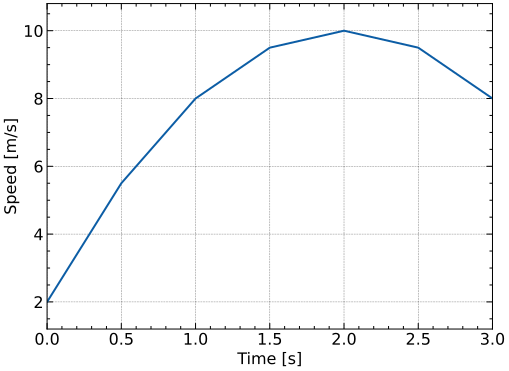

In [13]:
plt.plot(time, speed)
plt.xlabel("Time [s]")
plt.ylabel("Speed [m/s]")
plt.margins(0, 0.1)
plt.show();

In [14]:
interval = len(time) // 3
last_index = len(time) - len(time) % interval

time_slice = time[:last_index + 1:interval]
speed_slice = speed[:last_index:interval]

distance = speed_slice * np.diff(time_slice)
distance

array([ 2.,  8., 10.])

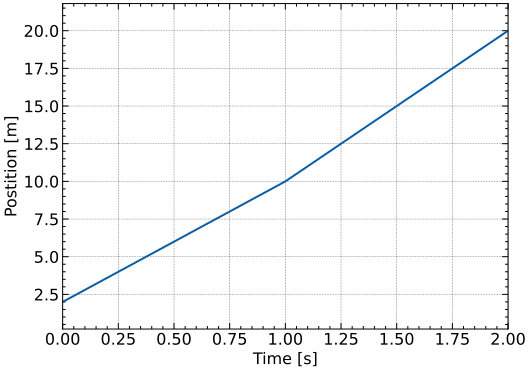

In [15]:
plt.plot(time_slice[:-1], np.cumsum(distance))
plt.xlabel("Time [s]")
plt.ylabel("Postition [m]")
plt.margins(0, 0.1)
plt.show();

In [16]:
np.cumsum(speed[:-1] * np.diff(time))

array([ 1.  ,  3.75,  7.75, 12.5 , 17.5 , 22.25])

In [17]:
from scipy.integrate import cumulative_trapezoid

cumulative_trapezoid(speed, time)

array([ 1.875,  5.25 ,  9.625, 14.5  , 19.375, 23.75 ])

In [18]:
equation = -2*t**2 + 8*t + 2

display_and_integrate(equation, symbols=(t, 0, 3));

The equation given is:


-2*t**2 + 8*t + 2

Its integral is equal to:


24

### Exercise 3.3.2

In [19]:
time = np.array([0, 0.2, 0.4, 0.6, 0.8, 1., 1.2, 1.4, 1.6])
speed = np.array([0, 1., 1.5, 1., 0.5, 0.5, -1., -2., -2.5])

cumulative_trapezoid(speed, time)[-1]

0.04999999999999949

### Exercise 3.3.3

In [20]:
time = np.array([0, 10, 20, 30, 40 ,50])
oxygen = np.array([0.5, 2.27, 3.34, 4., 4.39, 4.63]) / 60

cumulative_trapezoid(oxygen, time)[-1]

2.760833333333333

In [21]:
equation = E**x - 1
equation

exp(x) - 1

### Exercise 3.3.4

In [22]:
python_equation = smp.lambdify(x, equation, "numpy")
python_equation(2)

6.38905609893065

In [23]:
int_start = -1
int_stop = 2
stepsize = 1

time = np.arange(int_start, int_stop + stepsize, stepsize)  # note [start, stop) in step
cumulative_trapezoid(python_equation(time), time)[-1]

4.596749598510091

In [24]:
stepsize = 0.5

time = np.arange(int_start, int_stop + stepsize, stepsize)
cumulative_trapezoid(python_equation(time), time)[-1]

4.1668452996304595

In [25]:
display_and_integrate(equation, symbols=(x, -1, 2)).evalf(3)

The equation given is:


exp(x) - 1

Its integral is equal to:


-3 - exp(-1) + exp(2)

4.02

## Exercise 3.4: the substitution method

### Exercise 3.4.1

In [26]:
display_and_integrate(E**(-2*t), symbols=(t, 0, 2)).evalf(3)

The equation given is:


exp(-2*t)

Its integral is equal to:


1/2 - exp(-4)/2

0.491

In [27]:
display_and_integrate(cos(2 * ϕ), symbols=(ϕ, 0, pi));

The equation given is:


cos(2*ϕ)

Its integral is equal to:


0

In [28]:
display_and_integrate(1 / (2*x + 3), symbols=(x, 0, 2)).evalf(3)

The equation given is:


1/(2*x + 3)

Its integral is equal to:


-log(3)/2 + log(7)/2

0.424

In [29]:
display_and_integrate(1 / (x * ln(x)), symbols=(x, 2, E)).evalf(3)

The equation given is:


1/(x*log(x))

Its integral is equal to:


-log(log(2))

0.367

In [30]:
display_and_integrate(tan(ϕ), symbols=(ϕ, 0, 1)).evalf(3)

The equation given is:


tan(ϕ)

Its integral is equal to:


-log(cos(1))

0.616

### Exercise 3.4.2

In [31]:
display_and_integrate(sin(2*ϕ));

The equation given is:


sin(2*ϕ)

Its integral is equal to:


-cos(2*ϕ)/2

In [32]:
display_and_integrate(E**(6*t - 5));

The equation given is:


exp(6*t - 5)

Its integral is equal to:


exp(6*t - 5)/6

In [33]:
display_and_integrate(6 / (2*t - 3)**3);

The equation given is:


6/(2*t - 3)**3

Its integral is equal to:


-6/(16*t**2 - 48*t + 36)

In [34]:
display_and_integrate(4*t / (t**2 + 3));

The equation given is:


4*t/(t**2 + 3)

Its integral is equal to:


2*log(t**2 + 3)

## Exercise 3.5: kinematics

### Exercise 3.5.1

In [35]:
position = 2*t**3 - 6*t**2 + 4
position

2*t**3 - 6*t**2 + 4

In [36]:
speed = position.diff()
speed

6*t**2 - 12*t

In [37]:
accel = speed.diff()
accel

12*t - 12

In [38]:
smp.solve(smp.Eq(speed, 18))

[-1, 3]

In [39]:
smp.solve(smp.Eq(speed, -6))

[1]

In [40]:
smp.solve(smp.Eq(accel, 0))

[1]

### Exercise 3.5.2

In [41]:
accel = 3*E**(-2*t)

velocity = display_and_integrate(accel, symbols=t)
velocity = velocity - velocity.subs(t, 0)
velocity

The equation given is:


3*exp(-2*t)

Its integral is equal to:


-3*exp(-2*t)/2

3/2 - 3*exp(-2*t)/2

In [42]:
position = display_and_integrate(velocity, symbols=t)
position = position - position.subs(t, 0)

The equation given is:


3/2 - 3*exp(-2*t)/2

Its integral is equal to:


3*t/2 + 3*exp(-2*t)/4

In [43]:
position.subs(t, 1).evalf(4), position.subs(t, 10).evalf(4)

(0.8515, 14.25)

### Exercise 3.5.3

In [44]:
speed = 2 / t + 6
position = display_and_integrate(speed)

The equation given is:


6 + 2/t

Its integral is equal to:


6*t + 2*log(t)

In [45]:
position = position + (3 - position.subs(t, 1))
position

6*t + 2*log(t) - 3

In [46]:
position.subs(t, 1)

3

In [47]:
position.subs(t, 2).evalf(3)

10.4

## Exercise 3.6: multiple integration

### Exercise 3.6.1

In [48]:
display_and_integrate(r * sin(ϕ), symbols=((ϕ, 0, pi), (r, 0, 2)), unpack=True);

The equation given is:


r*sin(ϕ)

Its integral is equal to:


4

In [49]:
display_and_integrate(x**2 + y**2, symbols=((x, 0, 1), (y, 0, 2)), unpack=True);

The equation given is:


x**2 + y**2

Its integral is equal to:


10/3

In [50]:
display_and_integrate(r**2 * z, symbols=((ϕ, 0, 2*pi), (r, 2, 3), (z, 0, 2)), unpack=True).evalf(4)

The equation given is:


r**2*z

Its integral is equal to:


76*pi/3

79.59

In [51]:
display_and_integrate(3*x / y, symbols=((x, 0, 1), (y, 1, 2)), unpack=True).evalf(3)

The equation given is:


3*x/y

Its integral is equal to:


3*log(2)/2

1.04

### Exercise 3.6.2

In [52]:
speed = (2 - x**2) * (2 - y**2)
surface = 2 * 2

display_and_integrate(speed, symbols=((x, 0, 1), (y, 0, 1)), unpack=True) * surface

The equation given is:


(2 - x**2)*(2 - y**2)

Its integral is equal to:


25/9

100/9

### Exercise 3.6.3

In [53]:
speed = 4 - x**2 -y**2
surface = 2 * 2

display_and_integrate(speed, symbols=((x, 0, 1), (y, 0, 1)), unpack=True) * surface

The equation given is:


-x**2 - y**2 + 4

Its integral is equal to:


10/3

40/3

### Exercise 3.6.4

In [54]:
density = x**2 / (z + 1)

mass = display_and_integrate(density, symbols=((x, -1, 1), (y, -1, 1), (z, 0, 4)), unpack=True)
mass.evalf(3)

The equation given is:


x**2/(z + 1)

Its integral is equal to:


-4*log(3)/3 + 4*log(15)/3

2.15